In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('F:\datasets\delivery_time (1).csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

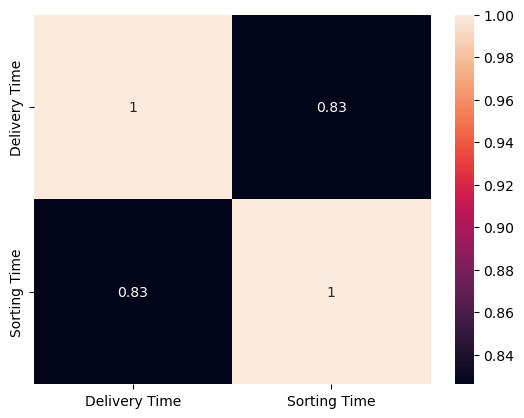

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1,inplace=True)

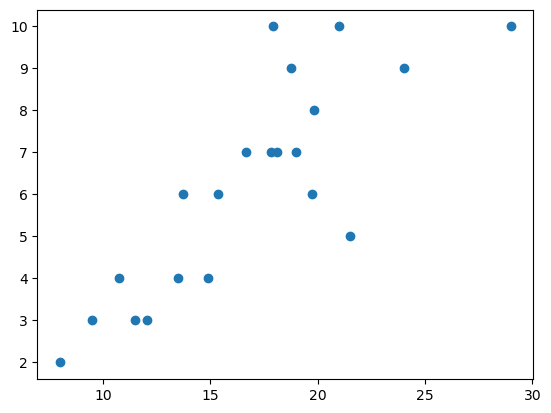

In [8]:
plt.scatter(df['Delivery_Time'],df['Sorting_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

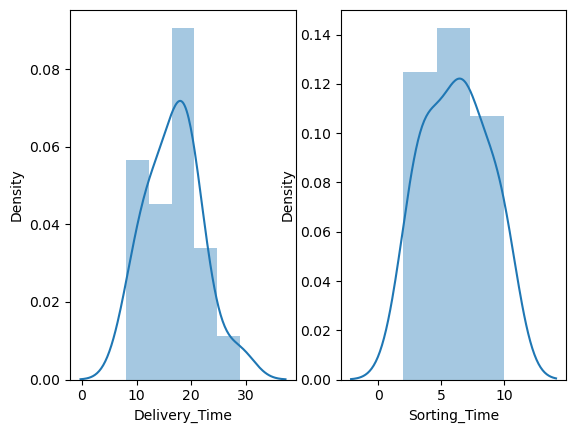

In [9]:
plt.subplot(1,2,1)
sns.distplot(df['Delivery_Time'])
plt.subplot(1,2,2)
sns.distplot(df['Sorting_Time'])

In [10]:
model=smf.ols('Delivery_Time~Sorting_Time',data=df).fit()

In [11]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [12]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 18 May 2023   Prob (F-statistic):           3.98e-06
Time:                        18:59:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
new=pd.DataFrame({
    'Sorting_Time':[8,4,12,1,9,13,0]
})

In [15]:
model.predict(new)

0    19.774893
1    13.178814
2    26.370973
3     8.231754
4    21.423913
5    28.019993
6     6.582734
dtype: float64

In [16]:
new['pred_delivary_time']=model.predict(new)
new

,Sorting_Time,pred_delivary_time
0,8,19.774893
1,4,13.178814
2,12,26.370973
3,1,8.231754
4,9,21.423913
5,13,28.019993
6,0,6.582734


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

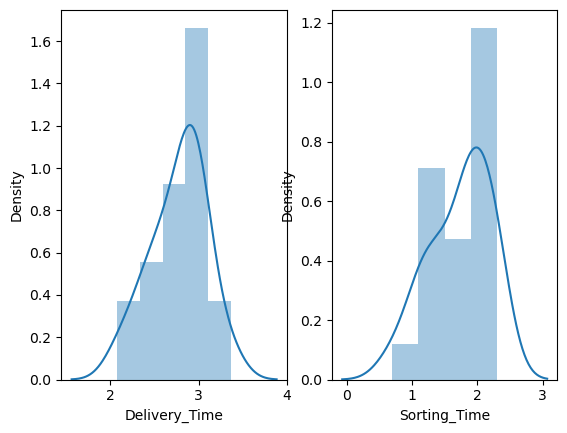

In [17]:
plt.subplot(1,2,1)
sns.distplot(np.log(df['Delivery_Time']))
plt.subplot(1,2,2)
sns.distplot(np.log(df['Sorting_Time']))

In [18]:
model=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=df).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 18 May 2023   Prob (F-statistic):           1.60e-07
Time:                           19:00:26   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q 2

In [21]:
df=pd.read_csv('F:\datasets\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [24]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

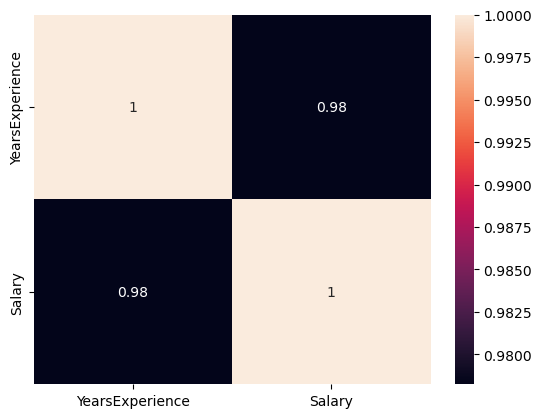

In [25]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

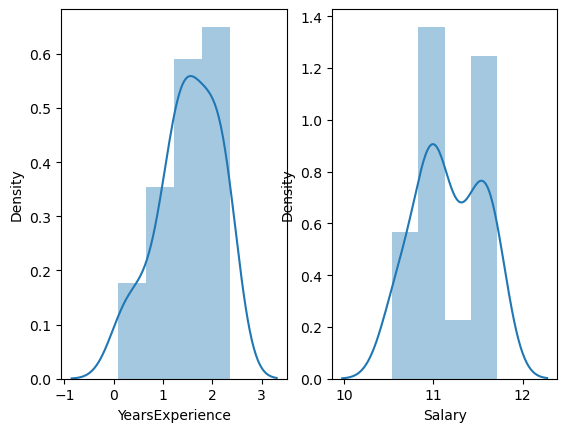

In [26]:
plt.subplot(1,2,1)
sns.distplot(np.log(df['YearsExperience']))
plt.subplot(1,2,2)
sns.distplot(np.log(df['Salary']))

In [27]:
model=smf.ols('Salary~YearsExperience',data=df).fit()

In [28]:
c,m=model.params
c,m

(25792.200198668703, 9449.962321455077)

In [29]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.14e-20
Time:                        19:05:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
new=pd.DataFrame(
{
    'YearsExperience':[2,0,7,10,15,9,4]
})

In [32]:
model.predict(new)

0     44692.124842
1     25792.200199
2     91941.936449
3    120291.823413
4    167541.635020
5    110841.861092
6     63592.049484
dtype: float64

In [33]:
new['pred_salary']=model.predict(new)

In [34]:
new

,YearsExperience,pred_salary
0,2,44692.124842
1,0,25792.200199
2,7,91941.936449
3,10,120291.823413
4,15,167541.635020
5,9,110841.861092
6,4,63592.049484


In [35]:
model=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=df).fit()

In [36]:
model.rsquared,model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)